In [54]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [55]:
haberman_data= pd.read_csv('datasets_474_966_haberman.csv', names= ['age', 'op_yr', 'ax', 'status'])
haberman_data.head()

,age,op_yr,ax,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [56]:
haberman_data.shape

(306, 4)

In [57]:
haberman_data.status.value_counts()

1    225
2     81
Name: status, dtype: int64

In [58]:
#haberman_data[]
renamer= {1: 'Survived', 2: 'Not_survived'}
haberman_data.status= haberman_data.status.map(renamer)  

In [59]:
haberman_data.head()

,age,op_yr,ax,status
0,30,64,1,Survived
1,30,62,3,Survived
2,30,65,0,Survived
3,31,59,2,Survived
4,31,65,4,Survived


In [60]:
surv= haberman_data.status.value_counts()['Survived']
nonsurv= haberman_data.status.value_counts()['Not_survived']
length= len(haberman_data)
print(f'The percentage of patients that survived the surgery is {round(100*(surv/length),2)}%')
print(f'The percentage of patients that did not survive the surgery is {round(100*(nonsurv/length),2)}%')

The percentage of patients that survived the surgery is 73.53%
The percentage of patients that did not survive the surgery is 26.47%


Observation: Alot of patients lived 5 years after the surgery
* Our dataset is imbalanced

In [61]:
haberman_data.describe()

,age,op_yr,ax
count,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144
std,10.803452,3.249405,7.189654
min,30.000000,58.000000,0.000000
25%,44.000000,60.000000,0.000000
50%,52.000000,63.000000,1.000000
75%,60.750000,65.750000,4.000000
max,83.000000,69.000000,52.000000


Observation, From the mean age, and that the standard deviation is quite small, its obvious this disease is predominant in old people.

## Univariate Analysis :

### Histogram

Text(0.5, 0, 'Age')

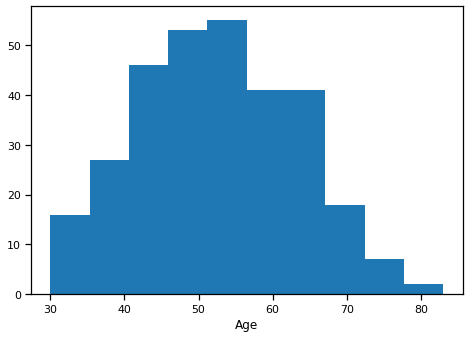

In [86]:
fig= plt.figure()
ax= fig.add_axes([0,0,1,1])
plt.hist(haberman_data['age'])
ax.set_xlabel('Age')

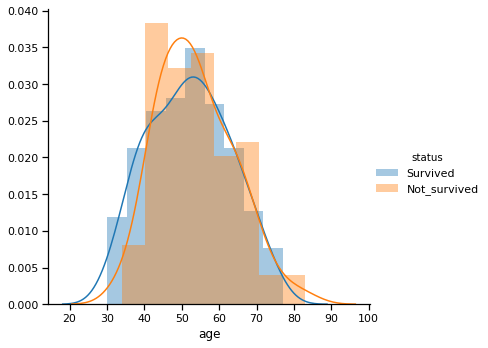

In [158]:
sns.set_context('notebook')
g= sns.FacetGrid(haberman_data, hue='status', height= 5, aspect=1.1)
g.map(sns.distplot, 'age').add_legend()

Observation:
The plot shows that the disease mainly affected the age bracket of 30-80, concentrating on ages between 50-60

The distribution of those that didnt' survive was very high between 40-45/50

Text(0.5, 0, 'Year of Operation')

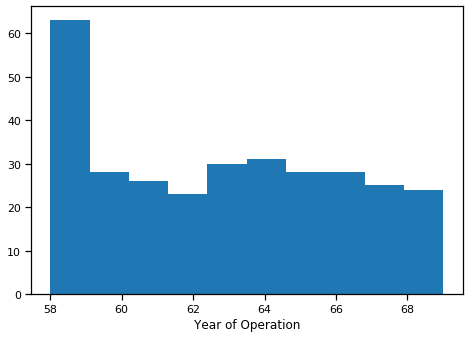

In [83]:
fig= plt.figure()
ax= fig.add_axes([0,0,1,1])
plt.hist(haberman_data['op_yr'], label='op_yr')
ax.set_xlabel('Year of Operation')

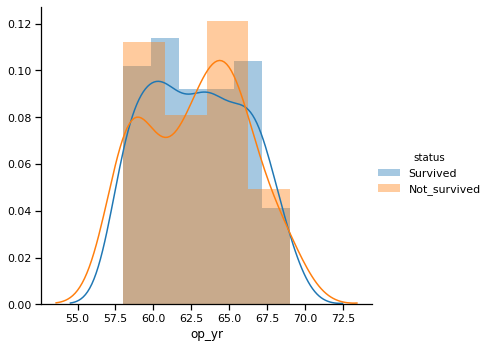

In [159]:
g= sns.FacetGrid(haberman_data, hue='status', height= 5, aspect=1.1)
g.map(sns.distplot, 'op_yr').add_legend()

Observation:
The spike for the distribution of those that didnt survive is between 65-67.5 years as opposed to those who survived, the max distribution of that class was at 60-62.5

in conclusion, it's possible the year they got their surgery done played a major role in their survival

Text(0.5, 0, 'Axil Nodes')

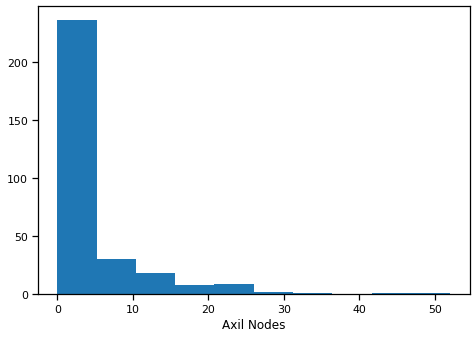

In [87]:
fig= plt.figure()
ax= fig.add_axes([0,0,1,1])
plt.hist(haberman_data['ax'], label='op_yr')
ax.set_xlabel('Axil Nodes')

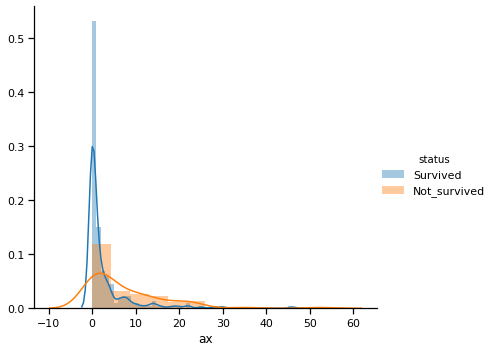

In [106]:
g= sns.FacetGrid(haberman_data, hue='status', height= 5, aspect=1.1)
g.map(sns.distplot, 'ax').add_legend()

Observation:
From this plot, it's quite obvious that over 90% of this who survived had no axil Nodes as opp0sed to those who didn't survive, again, we can say number of axil nodes found played a major role in their survival

## Probability Density Function & Commulative Density Function

In [107]:
haberman_data_Survived=haberman_data.loc[haberman_data["status"]=="Survived"]
haberman_data_Not_Survived=haberman_data.loc[haberman_data["status"]=="Not_survived"]

***Plotting the PDF,CDF for Operation Year for the above Segregated Data***

In [113]:
density_op_yr_survived,bin_edges_op_yr_survived=np.histogram(
    haberman_data_Survived['op_yr'],
    bins=10,
    density=True)

pdf_op_yr_survived=(density_op_yr_survived)/(sum(density_op_yr_survived))

In [114]:
density_op_yr_Not_Survived,bin_Edges_op_yr_Not_Survived=np.histogram(
    haberman_data_Not_Survived['op_yr'],
    bins=10,
    density=True)

pdf_op_yr_Not_Survived=(density_op_yr_Not_Survived)/(sum(density_op_yr_Not_Survived))

In [115]:
print("Bin Edges Survived : {}\n".format(bin_edges_op_yr_survived))
print("PDF Survived : {}\n".format(pdf_op_yr_survived))
print("Bin Edges Not Survived :{}\n".format(bin_Edges_op_yr_Not_Survived))
print("PDF Not Survived : {}\n".format(pdf_op_yr_Not_Survived))

Bin Edges Survived : [58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]

PDF Survived : [0.18666667 0.10666667 0.10222222 0.07111111 0.09777778 0.10222222
 0.06666667 0.09777778 0.09333333 0.07555556]

Bin Edges Not Survived :[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]

PDF Not Survived : [0.25925926 0.04938272 0.03703704 0.08641975 0.09876543 0.09876543
 0.16049383 0.07407407 0.04938272 0.08641975]



In [117]:
cdf_op_yr_Not_Survived=np.cumsum(pdf_op_yr_Not_Survived)
cdf_op_yr_survived=np.cumsum(pdf_op_yr_survived)

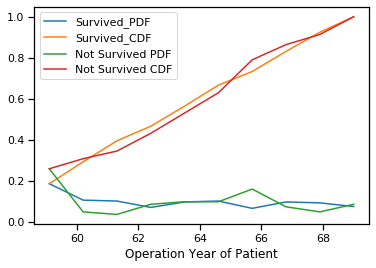

In [118]:
plt.plot(bin_edges_op_yr_survived[1:],pdf_op_yr_survived)
plt.plot(bin_edges_op_yr_survived[1:],cdf_op_yr_survived)
plt.plot(bin_Edges_op_yr_Not_Survived[1:],pdf_op_yr_Not_Survived)
plt.plot(bin_Edges_op_yr_Not_Survived[1:],cdf_op_yr_Not_Survived)
plt.xlabel('Operation Year of Patient')
plt.legend(['Survived_PDF','Survived_CDF','Not Survived PDF','Not Survived CDF'])

Observation:
Survival rates are high for patients who had their surgery less than 1960


***Plotting the PDF,CDF for Axil Nodes for the above Segregated Data***

In [124]:
density_ax_survived,bin_edges_ax_survived=np.histogram(
    haberman_data_Survived['ax'],
    bins=10,
    density=True)

pdf_ax_survived=(density_ax_survived)/(sum(density_ax_survived))

In [125]:
density_ax_Not_Survived,bin_Edges_ax_Not_Survived=np.histogram(
    haberman_data_Not_Survived['ax'],
    bins=10,
    density=True)

pdf_ax_Not_Survived=(density_ax_Not_Survived)/(sum(density_ax_Not_Survived))

In [126]:
print("Bin Edges Survived : {}\n".format(bin_edges_ax_survived))
print("PDF Survived : {}\n".format(pdf_ax_survived))
print("Bin Edges Not Survived :{}\n".format(bin_Edges_ax_Not_Survived))
print("PDF Not Survived : {}\n".format(pdf_ax_Not_Survived))

Bin Edges Survived : [ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]

PDF Survived : [0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]

Bin Edges Not Survived :[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]

PDF Not Survived : [0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]



In [127]:
cdf_ax_Not_Survived=np.cumsum(pdf_ax_Not_Survived)
cdf_ax_survived=np.cumsum(pdf_ax_survived)

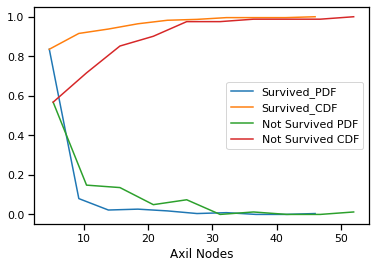

In [128]:
plt.plot(bin_edges_ax_survived[1:],pdf_ax_survived)
plt.plot(bin_edges_ax_survived[1:],cdf_ax_survived)
plt.plot(bin_Edges_ax_Not_Survived[1:],pdf_ax_Not_Survived)
plt.plot(bin_Edges_ax_Not_Survived[1:],cdf_ax_Not_Survived)
plt.xlabel('Axil Nodes')
plt.legend(['Survived_PDF','Survived_CDF','Not Survived PDF','Not Survived CDF'])

Observation:
Just like we stated earlier, patients who have Axil nodes less than 10 have high chances of surviving 


## Box Plot

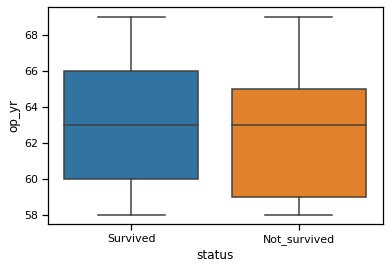

In [129]:
sns.boxplot(haberman_data['status'], haberman_data['op_yr'])

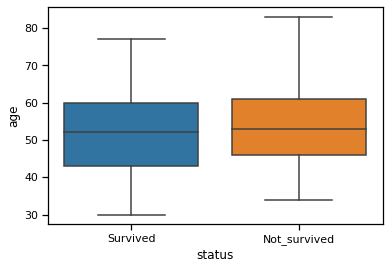

In [130]:
sns.boxplot(haberman_data['status'], haberman_data['age'])

Observation:
Here, the age distribution for those that survived and those that didn't survive is almost the same, Survived having its maximum age around 78 and Not survived having it around 83

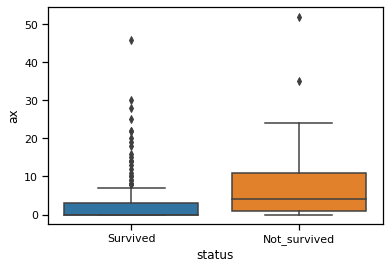

In [131]:
sns.boxplot(haberman_data['status'], haberman_data['ax'])

Observation:
So many outliers for those who survived, which represent rare cases of those having more than 10 axil nodes and still survived beacuse as we've estabished before that, most of the patients that survived had axil nodes less than 10

Also, The distribution of the Axil Nodes for those who didnt survive falls between 0 and 23

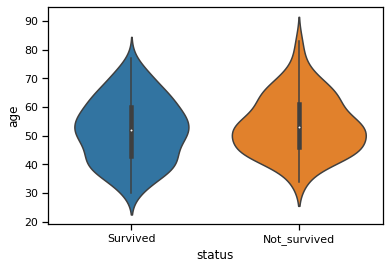

In [133]:
sns.violinplot(haberman_data['status'], haberman_data['age'])

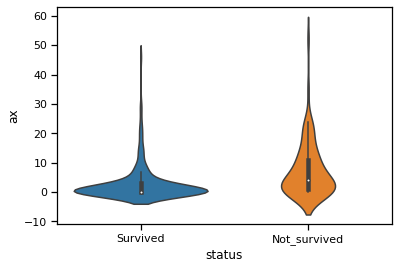

In [134]:
sns.violinplot(haberman_data['status'], haberman_data['ax'])

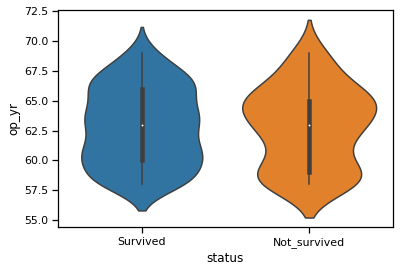

In [135]:
sns.violinplot(haberman_data['status'], haberman_data['op_yr'])

Observation:
The size of the violin representing the frequency shows that quitea large number of patients who had their surgery accross all years survived and some those patients who had their surgery 1960 didn't survive

# Bivariate Analysis

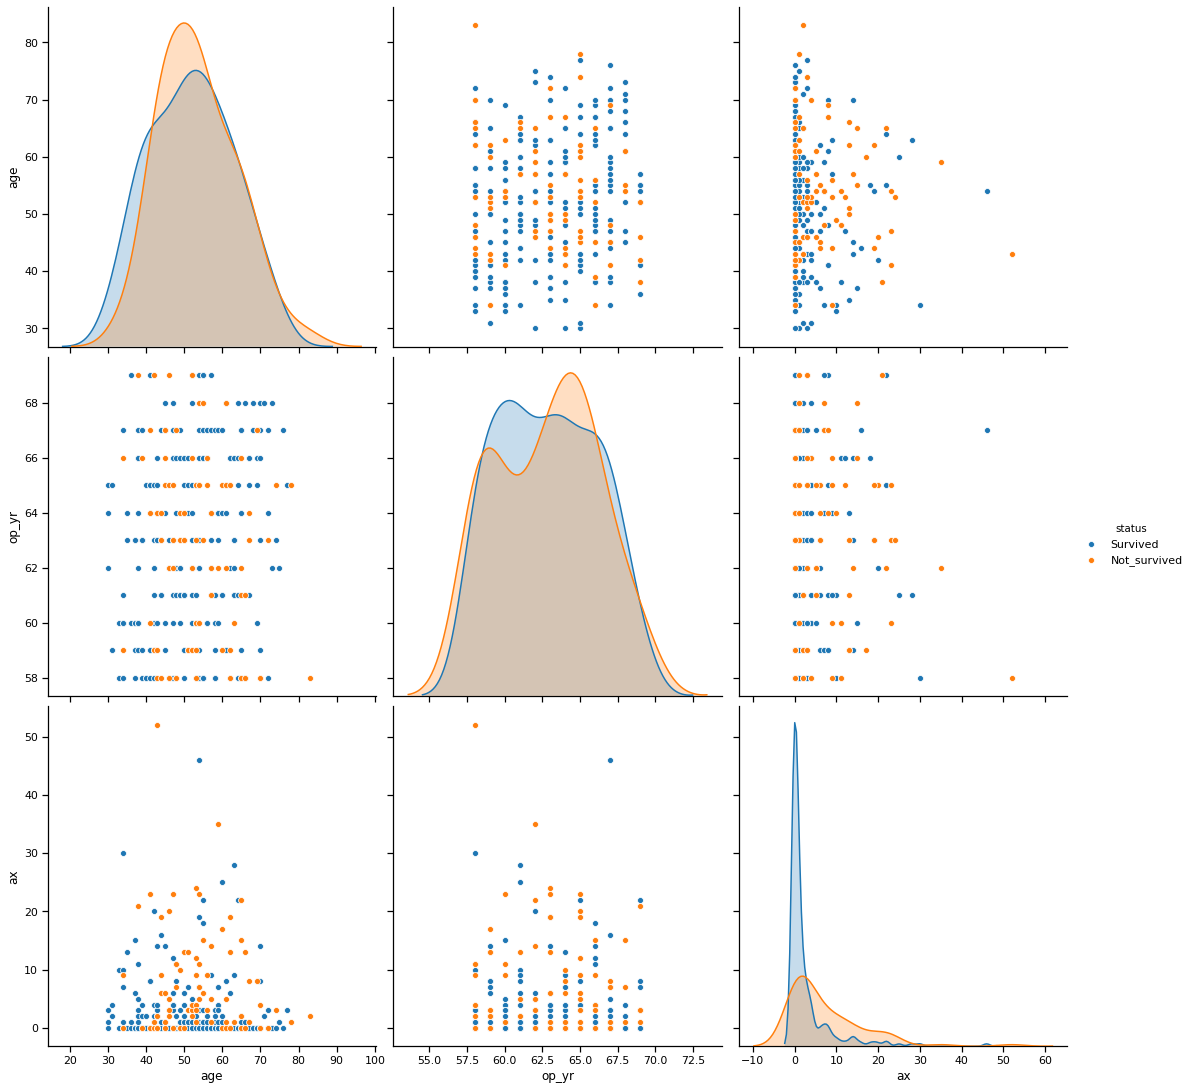

In [140]:
sns.pairplot(haberman_data, hue= 'status', diag_kind='kde', height=5)

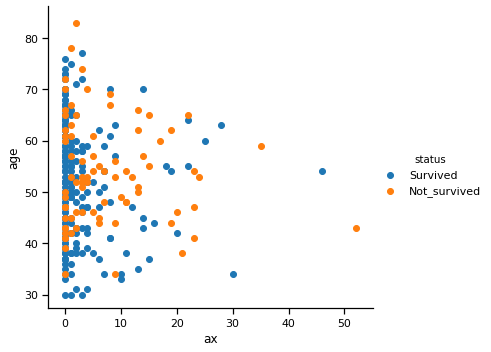

In [143]:
g= sns.FacetGrid(haberman_data, hue='status', height= 5, aspect=1.1)
g.map(plt.scatter, 'ax', 'age').add_legend()

Observation:
The bulk ofm those who survived irrespective of their age had way less than 10 Axil Nodes

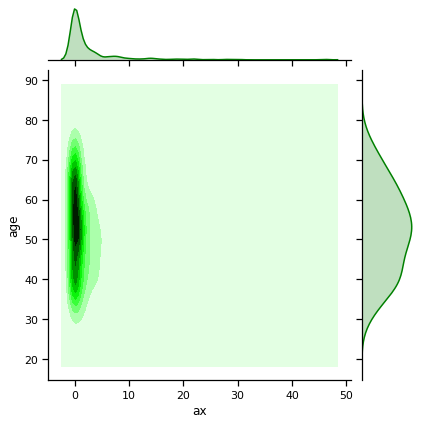

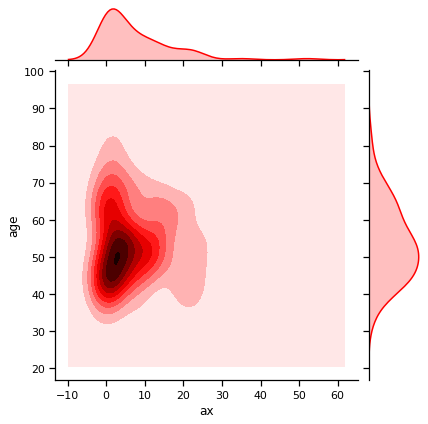

In [156]:
sns.jointplot(haberman_data_Survived['ax'], haberman_data_Survived['age'], kind='kde', color='green')
sns.jointplot(haberman_data_Not_Survived['ax'], haberman_data_Not_Survived['age'], kind='kde', color='red')

Observation:
Number of Axil Nodes and Age of Patient are the two important parameters that can be used to actually understand the factors supporting the two classes.

In summary, Most patients that survived had axil nodes less than 10, while some patients who didn't survive also had axil nodes in that range also, majority of them had more than 10